In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breakhis/Folds.csv
/kaggle/input/breakhis/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/README.txt
/kaggle/input/breakhis/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/count_files.sh
/kaggle/input/breakhis/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/benign/process_db_stat.py
/kaggle/input/breakhis/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/benign/fibroadenoma.stat.txt
/kaggle/input/breakhis/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/benign/phyllodes_tumor.stat.txt
/kaggle/input/breakhis/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/benign/tubular_adenoma.stat.txt
/kaggle/input/breakhis/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/benign/adenosis.stat.txt
/kaggle/input/breakhis/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/benign/README_B.txt
/kaggle/input/breakhis/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/benign/SOB/adenosis/SOB_B_A_14-29960CD/200X/SOB_B_A-14-29960CD-200-012.png
/kaggle/input/breakhis/BreaKHis_v1/BreaKHis_v1/histology_slides

# Library

In [7]:
import os
import pathlib
import glob
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras import Model
from tensorflow.keras.layers import *
from tensorflow.keras.preprocessing.image import *
import pandas as pd

# Data Preparation

In [8]:
data = pd.read_csv('/kaggle/input/breakhis/Folds.csv')

In [12]:
pd.DataFrame(data.head())

,fold,mag,grp,filename
0,1,100,train,/kaggle/input/breakhis/BreaKHis_v1/BreaKHis_v1...
1,1,100,train,/kaggle/input/breakhis/BreaKHis_v1/BreaKHis_v1...
2,1,100,train,/kaggle/input/breakhis/BreaKHis_v1/BreaKHis_v1...
3,1,100,train,/kaggle/input/breakhis/BreaKHis_v1/BreaKHis_v1...
4,1,100,train,/kaggle/input/breakhis/BreaKHis_v1/BreaKHis_v1...


In [9]:
data['filename']= os.path.join('/kaggle/input/breakhis/BreaKHis_v1/') + data['filename']

State of the art :
1. AlexNet, 
1. GoogLeNet/Inception, 
1. VGGNet
1. RNN)

# Load Images and Labels

In [11]:
def loadImagesLabels(img_path):
    images = []
    labels = []
    
    for img_p in img_path:
        img = load_img(img_p,target_size=(32,32), color_mode ='rgb')
        img = img_to_array(img)
        
        label = img_p.split(os.path.sep)[3]
        label = 'malignant' in label
        
        label = float(label)

        images.append(img)
        labels.append(label)
        
    return np.array(images), np.array(labels)

# The State of Art CNN Architecture

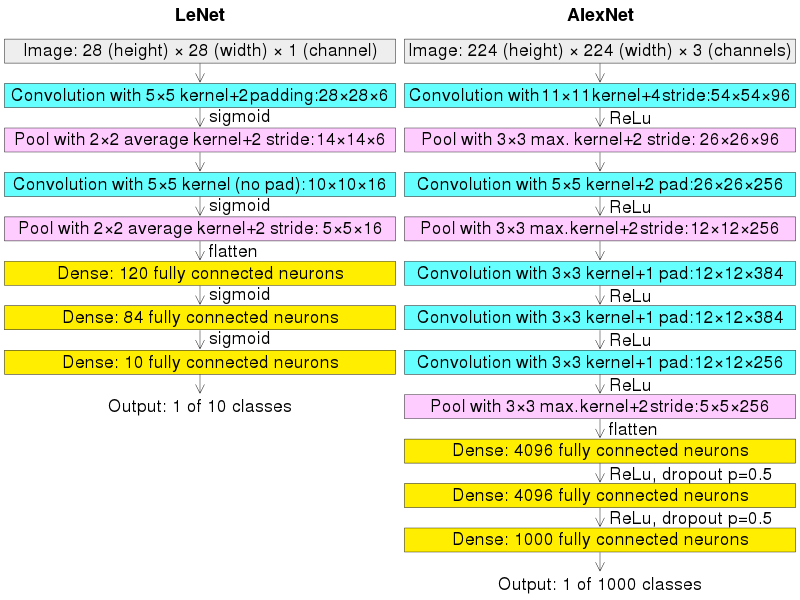

## 1. AlexNet

In [23]:
def build_networkAlex():

    #convolution = tehnik untuk menghaluskan suatu citra atau memperjelas citra 
    #dengan menggantikan nilai piksel dengan sejumlah nilai piksel yang sesuai atau berdekatan dengan piksel aslinya
    #maxpooling = 
    #
    #layer 1 = convolution
    input_layer = Input(shape=(32, 32, 3))
    x = Conv2D(filters=96,
               kernel_size=(3,3),
               strides=(4, 4))(input_layer)
    
    #layer 2 = reLu activation
    x = ReLU()(x)
    
    #layer 3 = maxpooling
    x = MaxPooling2D(pool_size=(2, 2),
                     strides=(2, 2))(x)
    
    #layer 4 = convolution
    x = Conv2D(256,(5,5),padding='same')(x)
    
    #layer 5 = maxpooling
    x = MaxPooling2D(pool_size=(2, 2),
                     strides=(2, 2))(x)
    
    #layer 6= Convolution
    x = Conv2D(384,(3,3),padding='same')(x)
    
    #layer 7 = relu activiation
    x = ReLU()(x)
    
    #layer 8 = convolution
    x = Conv2D(384,(3,3),padding='same')(x)
    
    #layer 9 = relu activation
    x = ReLU()(x)
    
    #layer 10 = convolution
    x = Conv2D(256,(3,3),padding='same')(x)
    
     #layer 11= relu activation
    x = ReLU()(x)
    
    #layer 12 = maxpooling
    x = MaxPooling2D(pool_size=(2, 2),
                     strides=(2, 2))(x)
    
    #layer 13
    x = Flatten()(x)
    x = Dense(units=4096)(x)
    x = ReLU()(x)
    x = Dropout(0.5)(x)
    
      #layer 14
    x = Dense(units=4096)(x)
    x = ReLU()(x)
    x = Dropout(0.5)(x)

    output = Dense(2, activation='softmax')(x)

    model = Model(inputs=input_layer, outputs=output)
    return model

## 2. LeNet

In [14]:
def build_LeNet():
    #convolution = tehnik untuk menghaluskan suatu citra atau memperjelas citra 
    #dengan menggantikan nilai piksel dengan sejumlah nilai piksel yang sesuai atau berdekatan dengan piksel aslinya
    #maxpooling = 
    #
    input_layer = Input(shape=(32, 32, 1))
    x = Conv2D(filters=20,
               kernel_size=(5, 5),
               padding='same',
               strides=(1, 1))(input_layer)
    x = ELU()(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2),
                     strides=(2, 2))(x)
    x = Dropout(0.4)(x)

    x = Conv2D(filters=50,
               kernel_size=(5, 5),
               padding='same',
               strides=(1, 1))(x)
    x = ELU()(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2),
                     strides=(2, 2))(x)
    x = Dropout(0.4)(x)

    x = Flatten()(x)
    x = Dense(units=500)(x)
    x = ELU()(x)
    x = Dropout(0.4)(x)

    output = Dense(2, activation='sigmoid')(x)

    model = Model(inputs=input_layer, outputs=output)
    return model

# 3. GoogLeNet

In [15]:

def Inception_block(input_layer, f1, f2_conv1, f2_conv3, f3_conv1, f3_conv5, f4): 
      # Input: 
      # - f1: number of filters of the 1x1 convolutional layer in the first path
      # - f2_conv1, f2_conv3 are number of filters corresponding to the 1x1 and 3x3 convolutional layers in the second path
      # - f3_conv1, f3_conv5 are the number of filters corresponding to the 1x1 and 5x5  convolutional layer in the third path
      # - f4: number of filters of the 1x1 convolutional layer in the fourth path

          # 1st path:
        path1 = Conv2D(filters=f1, kernel_size = (1,1), padding = 'same', activation = 'relu')(input_layer)

          # 2nd path
        path2 = Conv2D(filters = f2_conv1, kernel_size = (1,1), padding = 'same', activation = 'relu')(input_layer)
        path2 = Conv2D(filters = f2_conv3, kernel_size = (3,3), padding = 'same', activation = 'relu')(path2)

          # 3rd path
        path3 = Conv2D(filters = f3_conv1, kernel_size = (1,1), padding = 'same', activation = 'relu')(input_layer)
        path3 = Conv2D(filters = f3_conv5, kernel_size = (5,5), padding = 'same', activation = 'relu')(path3)

          # 4th path
        path4 = MaxPooling2D((3,3), strides= (1,1), padding = 'same')(input_layer)
        path4 = Conv2D(filters = f4, kernel_size = (1,1), padding = 'same', activation = 'relu')(path4)

        output_layer = concatenate([path1, path2, path3, path4], axis = -1)

        return output_layer

In [16]:
def build_GoogLeNet():
  # input layer 
    input_layer = Input(shape = (32, 32, 1))

    # convolutional layer: filters = 64, kernel_size = (7,7), strides = 2
    X = Conv2D(filters = 64, kernel_size = (7,7), strides = 2, padding = 'valid', activation = 'relu')(input_layer)

    # max-pooling layer: pool_size = (3,3), strides = 2
    X = MaxPooling2D(pool_size = (3,3), strides = 2)(X)

    # convolutional layer: filters = 64, strides = 1
    X = Conv2D(filters = 64, kernel_size = (1,1), strides = 1, padding = 'same', activation = 'relu')(X)

    # convolutional layer: filters = 192, kernel_size = (3,3)
    X = Conv2D(filters = 192, kernel_size = (3,3), padding = 'same', activation = 'relu')(X)

    # max-pooling layer: pool_size = (3,3), strides = 2
    X = MaxPooling2D(pool_size= (3,3), strides = 2)(X)

    # 1st Inception block
    X = Inception_block(X, f1 = 64, f2_conv1 = 96, f2_conv3 = 128, f3_conv1 = 16, f3_conv5 = 32, f4 = 32)

    # 2nd Inception block
    X = Inception_block(X, f1 = 128, f2_conv1 = 128, f2_conv3 = 192, f3_conv1 = 32, f3_conv5 = 96, f4 = 64)

    # max-pooling layer: pool_size = (3,3), strides = 2
    X = MaxPooling2D(pool_size= (3,3), strides = 2)(X)

    # 3rd Inception block
    X = Inception_block(X, f1 = 192, f2_conv1 = 96, f2_conv3 = 208, f3_conv1 = 16, f3_conv5 = 48, f4 = 64)

    # Extra network 1:
    X1 = AveragePooling2D(pool_size = (5,5), strides = 3)(X)
    X1 = Conv2D(filters = 128, kernel_size = (1,1), padding = 'same', activation = 'relu')(X1)
    X1 = Flatten()(X1)
    X1 = Dense(1024, activation = 'relu')(X1)
    X1 = Dropout(0.7)(X1)
    X1 = Dense(5, activation = 'softmax')(X1)


    # 4th Inception block
    X = Inception_block(X, f1 = 160, f2_conv1 = 112, f2_conv3 = 224, f3_conv1 = 24, f3_conv5 = 64, f4 = 64)

    # 5th Inception block
    X = Inception_block(X, f1 = 128, f2_conv1 = 128, f2_conv3 = 256, f3_conv1 = 24, f3_conv5 = 64, f4 = 64)

    # 6th Inception block
    X = Inception_block(X, f1 = 112, f2_conv1 = 144, f2_conv3 = 288, f3_conv1 = 32, f3_conv5 = 64, f4 = 64)

    # Extra network 2:
    X2 = AveragePooling2D(pool_size = (5,5), strides = 3)(X)
    X2 = Conv2D(filters = 128, kernel_size = (1,1), padding = 'same', activation = 'relu')(X2)
    X2 = Flatten()(X2)
    X2 = Dense(1024, activation = 'relu')(X2)
    X2 = Dropout(0.7)(X2)
    X2 = Dense(1000, activation = 'softmax')(X2)


    # 7th Inception block
    X = Inception_block(X, f1 = 256, f2_conv1 = 160, f2_conv3 = 320, f3_conv1 = 32, 
                      f3_conv5 = 128, f4 = 128)

    # max-pooling layer: pool_size = (3,3), strides = 2
    X = MaxPooling2D(pool_size = (3,3), strides = 2)(X)

    # 8th Inception block
    X = Inception_block(X, f1 = 256, f2_conv1 = 160, f2_conv3 = 320, f3_conv1 = 32, f3_conv5 = 128, f4 = 128)

    # 9th Inception block
    X = Inception_block(X, f1 = 384, f2_conv1 = 192, f2_conv3 = 384, f3_conv1 = 48, f3_conv5 = 128, f4 = 128)

    # Global Average pooling layer 
    X = GlobalAveragePooling2D(name = 'GAPL')(X)

    # Dropoutlayer 
    X = Dropout(0.4)(X)

    # output layer 
    X = Dense(2, activation = 'softmax')(X)

    # model
    model = Model(input_layer, [X, X1, X2], name = 'GoogLeNet')

    return model


# Feature X and y  on Dataset

In [17]:
X, y = loadImagesLabels(data['filename'])

In [18]:
X /= 255.0
total = len(y)
total_ = np.sum(y)
total_b = total - total_

In [19]:
total_b

39545.0

In [ ]:
print(f'Total images: {total}')
print(f'Malignant images: {total_}')
print(f'B images: {total_b}')

# Splitting training,testing,validation

In [20]:
(X_train, X_test,
 y_train, y_test) = train_test_split(X, y,
                                     test_size=0.3,
                                     stratify=y,
                                     random_state=999)
(X_train, X_val,
 y_train, y_val) = train_test_split(X_train, y_train,
                                    test_size=0.3,
                                    stratify=y_train,
                                    random_state=999)


# Modeling

In [24]:

model = build_networkAlex()
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

BATCH_SIZE = 32
EPOCHS = 20
model.fit(X_train, y_train,
          validation_data=(X_val, y_val),
          epochs=EPOCHS,
          batch_size=BATCH_SIZE,
          class_weight={
              1.0: total / total_,
              0.0: total / total_b
          })


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in double_scalars
  del sys.path[0]


Epoch 1/20


ValueError: in user code:

    /opt/conda/lib/python3.7/site-packages/keras/engine/training.py:853 train_function  *
        return step_function(self, iterator)
    /opt/conda/lib/python3.7/site-packages/keras/engine/training.py:842 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    /opt/conda/lib/python3.7/site-packages/keras/engine/training.py:835 run_step  **
        outputs = model.train_step(data)
    /opt/conda/lib/python3.7/site-packages/keras/engine/training.py:789 train_step
        y, y_pred, sample_weight, regularization_losses=self.losses)
    /opt/conda/lib/python3.7/site-packages/keras/engine/compile_utils.py:201 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    /opt/conda/lib/python3.7/site-packages/keras/losses.py:141 __call__
        losses = call_fn(y_true, y_pred)
    /opt/conda/lib/python3.7/site-packages/keras/losses.py:245 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/util/dispatch.py:206 wrapper
        return target(*args, **kwargs)
    /opt/conda/lib/python3.7/site-packages/keras/losses.py:1809 binary_crossentropy
        backend.binary_crossentropy(y_true, y_pred, from_logits=from_logits),
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/util/dispatch.py:206 wrapper
        return target(*args, **kwargs)
    /opt/conda/lib/python3.7/site-packages/keras/backend.py:5000 binary_crossentropy
        return tf.nn.sigmoid_cross_entropy_with_logits(labels=target, logits=output)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/util/dispatch.py:206 wrapper
        return target(*args, **kwargs)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/ops/nn_impl.py:246 sigmoid_cross_entropy_with_logits_v2
        logits=logits, labels=labels, name=name)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/util/dispatch.py:206 wrapper
        return target(*args, **kwargs)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/ops/nn_impl.py:133 sigmoid_cross_entropy_with_logits
        (logits.get_shape(), labels.get_shape()))

    ValueError: logits and labels must have the same shape ((None, 2) vs (None, 1))


In [21]:

model1 = build_LeNet()
model1.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

BATCH_SIZE = 32
EPOCHS = 20
model1.fit(X_train, y_train,
          validation_data=(X_val, y_val),
          epochs=EPOCHS,
          batch_size=BATCH_SIZE,
          class_weight={
              1.0: total / total_,
              0.0: total / total_b
          })


2023-02-21 11:33:45.402050: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-21 11:33:45.506945: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-21 11:33:45.507759: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-21 11:33:45.509602: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Epoch 1/20


2023-02-21 11:33:48.559975: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


ValueError: in user code:

    /opt/conda/lib/python3.7/site-packages/keras/engine/training.py:853 train_function  *
        return step_function(self, iterator)
    /opt/conda/lib/python3.7/site-packages/keras/engine/training.py:842 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    /opt/conda/lib/python3.7/site-packages/keras/engine/training.py:835 run_step  **
        outputs = model.train_step(data)
    /opt/conda/lib/python3.7/site-packages/keras/engine/training.py:787 train_step
        y_pred = self(x, training=True)
    /opt/conda/lib/python3.7/site-packages/keras/engine/base_layer.py:1037 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    /opt/conda/lib/python3.7/site-packages/keras/engine/functional.py:415 call
        inputs, training=training, mask=mask)
    /opt/conda/lib/python3.7/site-packages/keras/engine/functional.py:550 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    /opt/conda/lib/python3.7/site-packages/keras/engine/base_layer.py:1020 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /opt/conda/lib/python3.7/site-packages/keras/engine/input_spec.py:254 assert_input_compatibility
        ' but received input with shape ' + display_shape(x.shape))

    ValueError: Input 0 of layer conv2d is incompatible with the layer: expected axis -1 of input shape to have value 1 but received input with shape (None, 32, 32, 3)


In [22]:

model2 = build_LeNet()
model2.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

BATCH_SIZE = 32
EPOCHS = 20
model2.fit(X_train, y_train,
          validation_data=(X_val, y_val),
          epochs=EPOCHS,
          batch_size=BATCH_SIZE,
          class_weight={
              1.0: total / total_,
              0.0: total / total_b
          })

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in double_scalars
  del sys.path[0]


Epoch 1/20


ValueError: in user code:

    /opt/conda/lib/python3.7/site-packages/keras/engine/training.py:853 train_function  *
        return step_function(self, iterator)
    /opt/conda/lib/python3.7/site-packages/keras/engine/training.py:842 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    /opt/conda/lib/python3.7/site-packages/keras/engine/training.py:835 run_step  **
        outputs = model.train_step(data)
    /opt/conda/lib/python3.7/site-packages/keras/engine/training.py:787 train_step
        y_pred = self(x, training=True)
    /opt/conda/lib/python3.7/site-packages/keras/engine/base_layer.py:1037 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    /opt/conda/lib/python3.7/site-packages/keras/engine/functional.py:415 call
        inputs, training=training, mask=mask)
    /opt/conda/lib/python3.7/site-packages/keras/engine/functional.py:550 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    /opt/conda/lib/python3.7/site-packages/keras/engine/base_layer.py:1020 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /opt/conda/lib/python3.7/site-packages/keras/engine/input_spec.py:254 assert_input_compatibility
        ' but received input with shape ' + display_shape(x.shape))

    ValueError: Input 0 of layer conv2d_2 is incompatible with the layer: expected axis -1 of input shape to have value 1 but received input with shape (None, 32, 32, 3)


In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {test_loss}, accuracy: {test_accuracy}')